In [81]:
from tqdm import tqdm
import numpy as np 
import pandas as pd
import itertools
import random
import os
import gc

import plotly.express as px
import plotly.graph_objs as go

# import pandas_profiling as pdp
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
# from matplotlib_venn import venn2
import matplotlib.pyplot as plt

In [3]:
deliv = pd.read_csv('deliveries.csv')
match = pd.read_csv('matches.csv')

In [4]:
deliv.head(3)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN


In [5]:
match.head(3)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar


In [6]:
deliv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [7]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [13]:
print(deliv.isnull().sum())
print('\n')
print(match.isnull().sum())

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64


id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64


In [17]:
print(deliv.columns ,  '\n\n')
print(match.columns)

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object') 


Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')


In [18]:
print(deliv.shape , '\n')
print(match.shape)

(260920, 17) 

(1095, 20)


In [20]:
# print(deliv['winner'].unique())

In [21]:
# Filling missing city values based on venue
match.loc[(match['city'].isna()) & (match['venue'] == 'Sharjah Cricket Stadium'), 'city'] = 'Sharjah'
match.loc[(match['city'].isna()) & (match['venue'] == 'Dubai International Cricket Stadium'), 'city'] = 'Dubai'
match['city'].isnull().sum()

0

In [22]:
#replacing season in correct format
match.replace({'season': {"2020/21": "2020", "2009/10": "2010", "2007/08": "2008"}}, inplace=True)

In [24]:
match.value_counts('city')

city
Mumbai            173
Kolkata            93
Delhi              90
Chennai            85
Hyderabad          77
Bangalore          65
Chandigarh         61
Jaipur             57
Pune               51
Dubai              46
Abu Dhabi          37
Ahmedabad          36
Bengaluru          29
Sharjah            28
Visakhapatnam      15
Durban             15
Lucknow            14
Dharamsala         13
Centurion          12
Rajkot             10
Indore              9
Navi Mumbai         9
Johannesburg        8
Ranchi              7
Port Elizabeth      7
Cape Town           7
Cuttack             7
Raipur              6
Mohali              5
Kochi               5
Kanpur              4
Guwahati            3
Kimberley           3
East London         3
Nagpur              3
Bloemfontein        2
dtype: int64

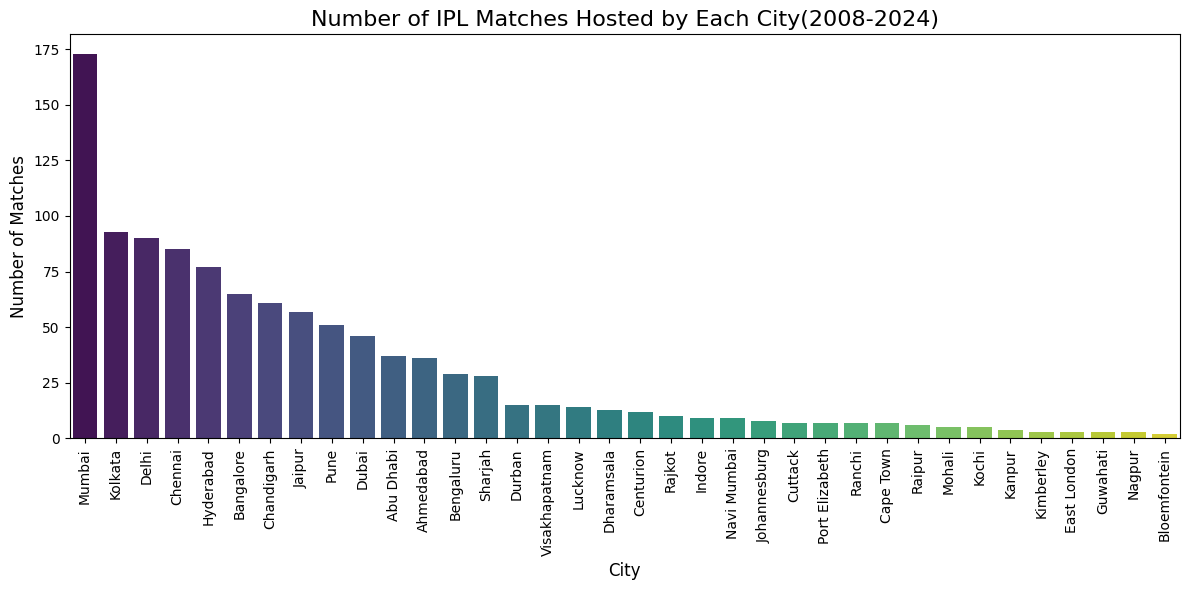

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Replace NaN values in 'city' column with 'Unknown' and count the occurrences
city_counts = match['city'].replace(np.NaN, 'Unknown').value_counts()

# Creating a bar plot
plt.figure(figsize=(12, 6))  # Set the figure size
sns.barplot(x=city_counts.index, y=city_counts.values, palette='viridis')

# Add titles and labels
plt.title('Number of IPL Matches Hosted by Each City(2008-2024)', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Number of Matches', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()  
plt.show()

In [25]:
match['city'].fillna('Mumbai', inplace=True) # fill with mode of this columns 
match['winner'].fillna('No Result', inplace=True)
match['player_of_match'].fillna('No Result',inplace=True)
median_margin = match['result_margin'].median()
match['result_margin'].fillna(median_margin, inplace=True)
median_target_runs= match['target_runs'].median()
match['target_runs'].fillna(median_target_runs, inplace=True)
median_target_overs = match['target_overs'].median()
match['target_overs'].fillna(median_target_overs, inplace=True)
match['method'].fillna('No method applied', inplace=True)

In [27]:
match.isnull().sum()

id                 0
season             0
city               0
date               0
match_type         0
player_of_match    0
venue              0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
target_runs        0
target_overs       0
super_over         0
method             0
umpire1            0
umpire2            0
dtype: int64

In [31]:
#Replacing Team old name to new name , keeping a single name for a single city based franchise
team_map ={"Mumbai Indians":"Mumbai Indians",
          "Chennai Super Kings":"Chennai Super Kings",
          "Kolkata Knight Riders":"Kolkata Knight Riders",
          "Royal Challengers Bangalore":"Royal Challengers Bengaluru",
          "Royal Challengers Bengaluru":"Royal Challengers Bengaluru",
          "Rajasthan Royals":"Rajasthan Royals",
          "Kings XI Punjab":"Punjab Kings",
          "Punjab Kings":"Punjab Kings",
          "Sunrisers Hyderabad":"Sunrisers Hyderabad",
          "Deccan Chargers":"Sunrisers Hyderabad",
          "Delhi Capitals":"Delhi Capitals",
          "Delhi Daredevils":"Delhi Capitals",
          "Gujarat Titans":"Gujarat Titans",
          "Gujarat Lions":"Gujarat Titans",
          "Lucknow Super Giants":"Lucknow Super Giants",
          "Pune Warriors":"Rising Pune Supergiants",
          "Rising Pune Supergiant":"Rising Pune Supergiants",
          "Rising Pune Supergiants":"Rising Pune Supergiants",
          "Kochi Tuskers Kerala":"Kochi Tuskers Kerala"}

In [32]:
#For Match table 
match['team1']= match['team1'].map(team_map)
match['team2']= match['team2'].map(team_map)
match['winner']= match['winner'].map(team_map)
match['toss_winner']= match['toss_winner'].map(team_map)

#For Deliverise Tables 
deliv['batting_team']= deliv['batting_team'].map(team_map)
deliv['bowling_team']= deliv['bowling_team'].map(team_map)

In [33]:
match['venue'].unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Brabourne Stadium, Mumbai',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Maharashtra Cricket Association Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sh

In [34]:
match['venue']=match['venue'].str.replace('Feroz Shah Kotla','Arun Jaitley Stadium')
match['venue']=match['venue'].str.replace('Arun Jaitley Stadium, Delhi','Arun Jaitley Stadium')
match['venue']=match['venue'].str.replace('Eden Gardens, Kolkata','Eden Gardens')
match['venue']=match['venue'].str.replace('Eden Gardens, Kolkata, Kolkata','Eden Gardens')
match['venue']=match['venue'].str.replace('Wankhede Stadium, Mumbai','Wankhede Stadium')
match['venue']=match['venue'].str.replace('Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh','Punjab Cricket Association Stadium, Mohali')
match['venue']=match['venue'].str.replace('Rajiv Gandhi International Stadium, Uppal, Hyderabad','Rajiv Gandhi International Stadium, Uppal')
match['venue']=match['venue'].str.replace('MA Chidambaram Stadium','MA Chidambaram Stadium, Chepauk')
match['venue']=match['venue'].str.replace('MA Chidambaram Stadium, Chepauk, Chennai','MA Chidambaram Stadium, Chepauk')

In [64]:
stadium_data=match.value_counts('venue').reset_index()
stadium_data.columns = ['stadium', 'Number of matches']
Top_20_stadium=stadium_data.head(20)
Top_20_stadium.style.background_gradient(cmap='cividis')

,stadium,Number of matches
0,Wankhede Stadium,118
1,Eden Gardens,93
2,Arun Jaitley Stadium,90
3,M Chinnaswamy Stadium,65
4,"Rajiv Gandhi International Stadium, Uppal",62
5,"MA Chidambaram Stadium, Chepauk, Chepauk",48
6,Sawai Mansingh Stadium,47
7,Dubai International Cricket Stadium,46
8,"Punjab Cricket Association Stadium, Mohali",40
9,Sheikh Zayed Stadium,29


In [37]:
#Trend of Total Matches Over Seasons
match['season'].value_counts().to_frame().T

,2013,2023,2012,2022,2011,2024,2018,2021,2020,2019,2016,2014,2010,2017,2015,2008,2009
season,76,74,74,74,73,71,60,60,60,60,60,60,60,59,59,58,57


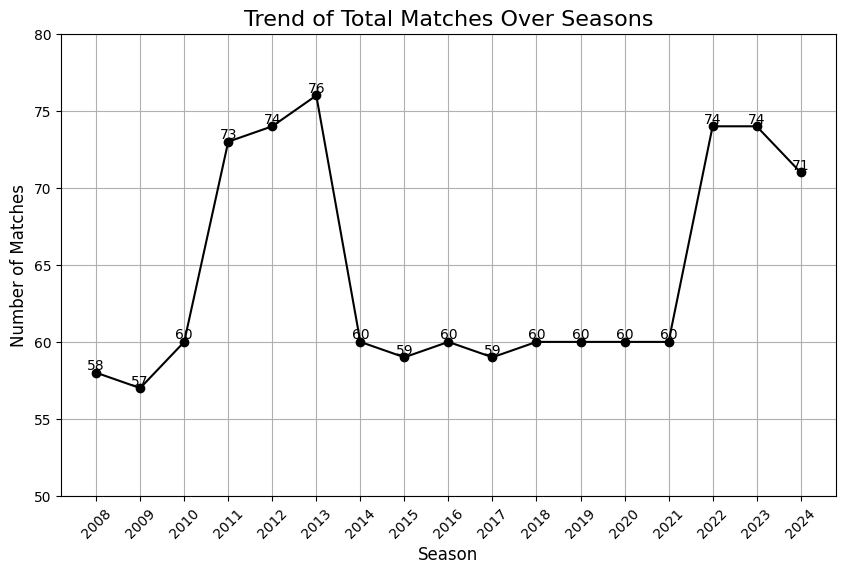

In [39]:
import matplotlib.pyplot as plt

season_counts = match['season'].value_counts().sort_index()

# Ploting the trend as a line chart
plt.figure(figsize=(10, 6))  
plt.plot(season_counts.index, season_counts.values, marker='o', linestyle='-', color='black')

# Adding titles and labels
plt.title('Trend of Total Matches Over Seasons', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Number of Matches', fontsize=12)
plt.ylim(50,80)

# Annotating each data point with the value
for i, value in enumerate(season_counts.values):
    plt.text(season_counts.index[i], value, str(value), fontsize=10, ha='center', va='bottom')
plt.xticks(rotation=45)  
plt.grid(True)           
plt.show()

DISTRIBUTION OF TARGET RUNS ...

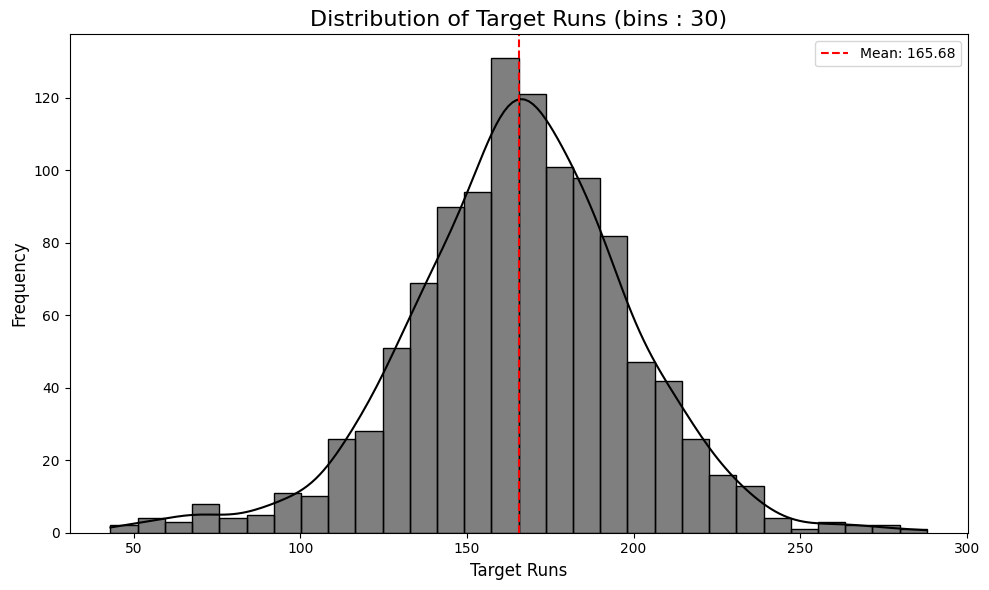

Mean Target Run 2008-2024 : 165.68493150684932


In [62]:
# Calculating the mean of 'target_runs'
mean_target_runs = match['target_runs'].mean()

# Creating histogram plot to show the distribution 
plt.figure(figsize=(10, 6))  # Set the figure size
sns.histplot(match['target_runs'].dropna(), bins=30, kde=True, color='black') 

# Adding a vertical line for the mean
plt.axvline(mean_target_runs, color='red', linestyle='--', label=f'Mean: {mean_target_runs:.2f}')

# Adding titles and labels
plt.title('Distribution of Target Runs (bins : 30)', fontsize=16)
plt.xlabel('Target Runs', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.tight_layout()  
plt.show()



#Average Target Run in IPL Matches
print('Mean Target Run 2008-2024 :' , mean_target_runs)

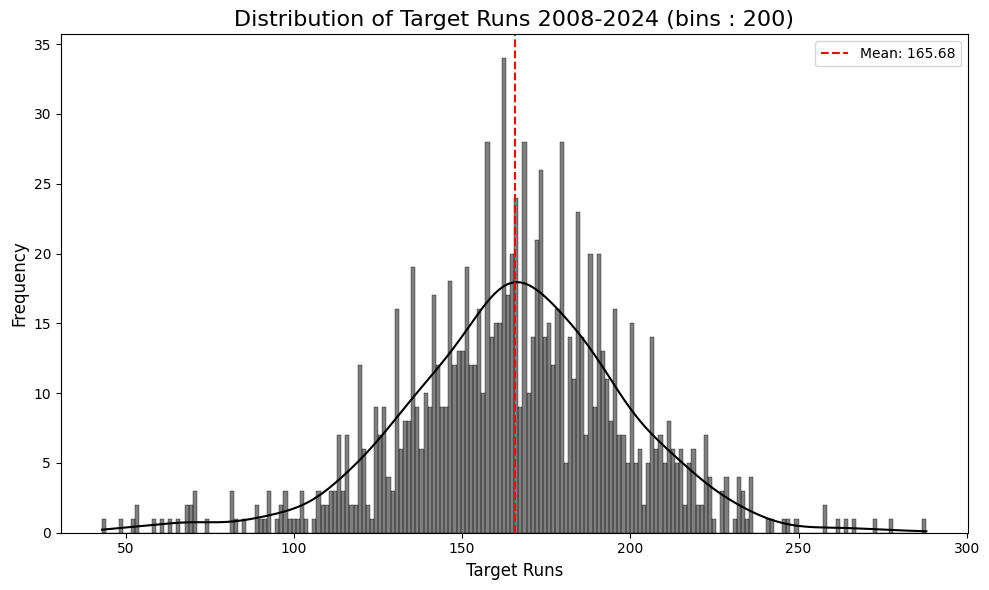

Mean Target Run 2008-2024 : 165.68493150684932


In [61]:
# Calculating the mean of 'target_runs'
mean_target_runs = match['target_runs'].mean()

# Creating histogram plot to show the distribution 
plt.figure(figsize=(10, 6))  # Set the figure size
sns.histplot(match['target_runs'].dropna(), bins=200, kde=True, color='black') 

# Adding a vertical line for the mean
plt.axvline(mean_target_runs, color='red', linestyle='--', label=f'Mean: {mean_target_runs:.2f}')

# Adding titles and labels
plt.title('Distribution of Target Runs 2008-2024 (bins : 200)', fontsize=16)
plt.xlabel('Target Runs', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.tight_layout()  
plt.show()


#Average Target Run in IPL Matches
print('Mean Target Run 2008-2024 :' , mean_target_runs)

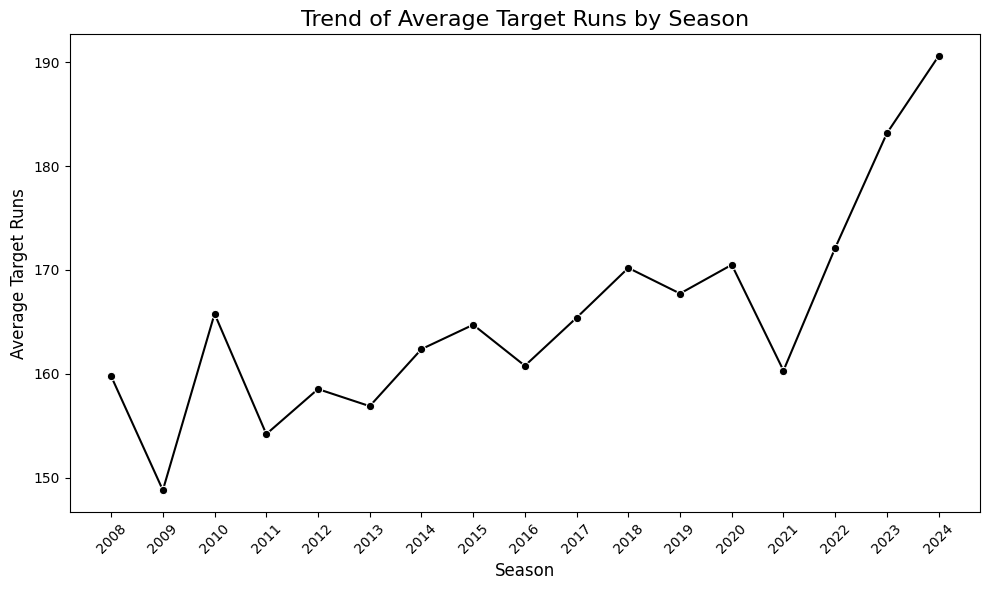

In [65]:
# avg target run by season 
avg_run_byseason = pd.pivot_table(data=match, index='season', values='target_runs', aggfunc='mean')
avg_run_byseason.reset_index(inplace=True)

# Creating line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_run_byseason, x='season', y='target_runs', marker='o', color='black')

# Adding titles and labels
plt.title('Trend of Average Target Runs by Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Average Target Runs', fontsize=12)
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

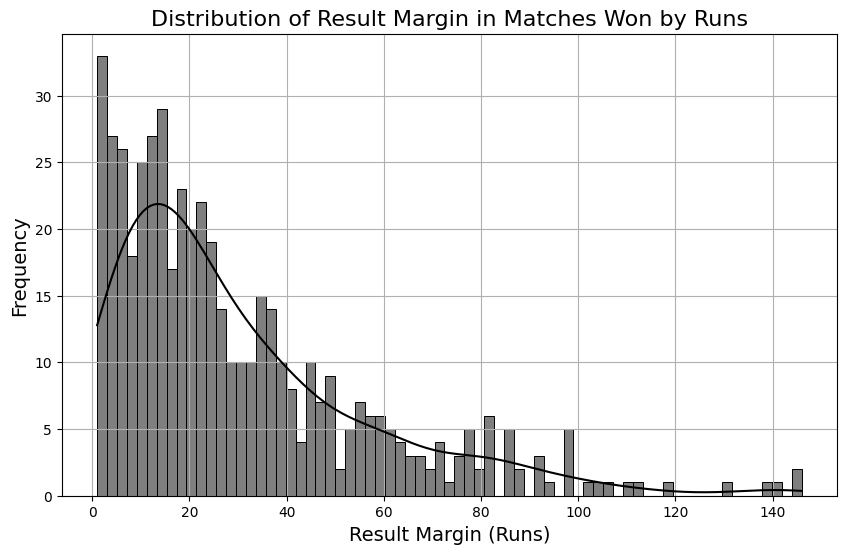

In [68]:
# distribution of results won by runs
runs_margin = match[match['result'] == 'runs']['result_margin']

# Ploting the distribution of result margins using histogram 
plt.figure(figsize=(10, 6))
sns.histplot(runs_margin, bins=71, kde=True, color='black')

# Adding titles and labels
plt.title('Distribution of Result Margin in Matches Won by Runs', fontsize=16)
plt.xlabel('Result Margin (Runs)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid()
plt.show()

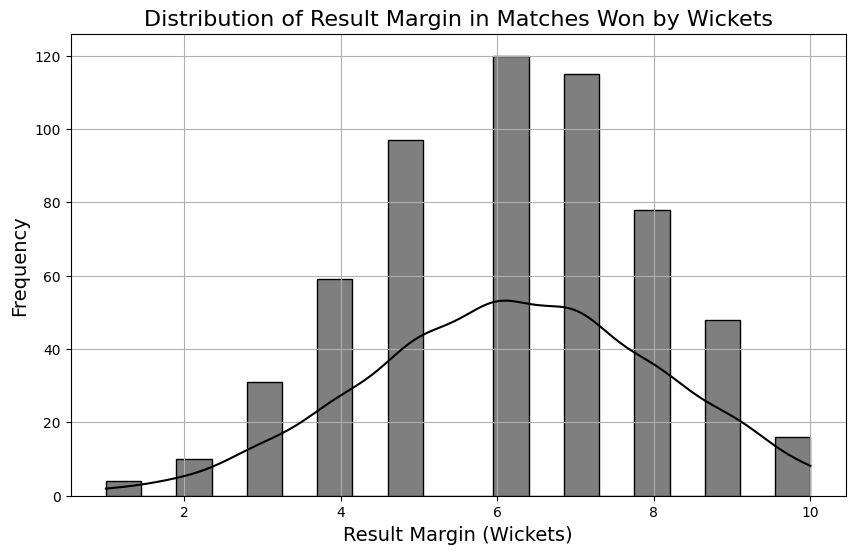

In [73]:
# distribution of results won by wickets
wickets_margin = match[match['result'] == 'wickets']['result_margin']

# Plot the distribution of result margins using histogram
plt.figure(figsize=(10, 6))
sns.histplot(wickets_margin, bins=20, kde=True, color='black')

# Adding titles and labels
plt.title('Distribution of Result Margin in Matches Won by Wickets', fontsize=16)
plt.xlabel('Result Margin (Wickets)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid()
plt.show()

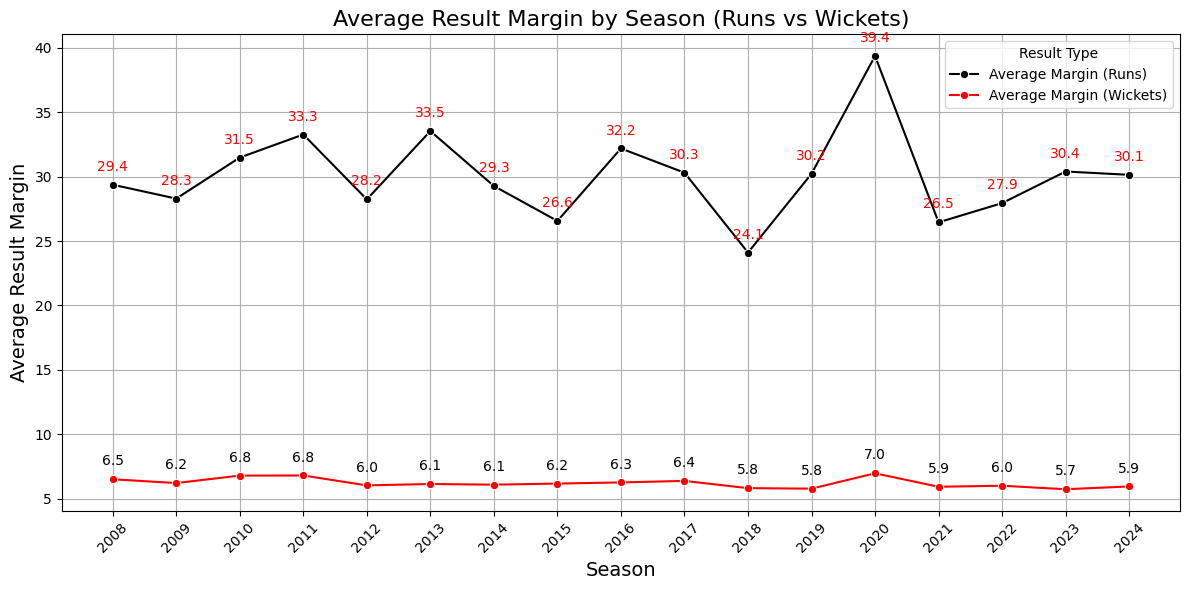

In [76]:
# average result margin across seasons for both runs and wickets
result_margins = match[(match['result'] == 'runs') | (match['result'] == 'wickets')]

# Creating a pivot table for average result margins by season and result type
avg_result = pd.pivot_table(
    data=result_margins, 
    index='season', 
    columns='result', 
    values='result_margin', 
    aggfunc='mean'
)

# Resetting the index for plotting
avg_result.reset_index(inplace=True)

# Plotting the average result margins
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_result, x='season', y='runs', marker='o', label='Average Margin (Runs)', color='black')
sns.lineplot(data=avg_result, x='season', y='wickets', marker='o', label='Average Margin (Wickets)', color='red')



# Adding titles and labels
plt.title('Average Result Margin by Season (Runs vs Wickets)', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Average Result Margin', fontsize=14)
plt.legend(title='Result Type')

# Showing the values on markers
for index, row in avg_result.iterrows():
    plt.annotate(f'{row["runs"]:.1f}', 
                 (row['season'], row['runs']), 
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center', fontsize=10, color='red')
    
    plt.annotate(f'{row["wickets"]:.1f}', 
                 (row['season'], row['wickets']), 
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center', fontsize=10, color='black')

plt.grid()
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

In [85]:
winning_data = match.value_counts('winner').reset_index(name='Number of matches win')
fig = px.pie(winning_data, values="Number of matches win", names="winner")
fig.update_layout(
    template="plotly_dark",
    title={
        'text': 'Which Teams Dominate IPL From Beginning',
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 24, 'family': 'Arial', 'color': '#fed400'}
    }
)

fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [87]:
runs_data=match.groupby('season')['target_runs'].sum().reset_index()
runs_data.columns = ['Season', 'Total Runs']


In [89]:
runs_data

,Season,Total Runs
0,2008,9267.0
1,2009,8482.0
2,2010,9947.0
3,2011,11257.0
4,2012,11732.0
5,2013,11924.0
6,2014,9743.0
7,2015,9719.0
8,2016,9647.0
9,2017,9759.0


  toss_decision  wins  percentage
0           bat   390   35.779817
1         field   700   64.220183


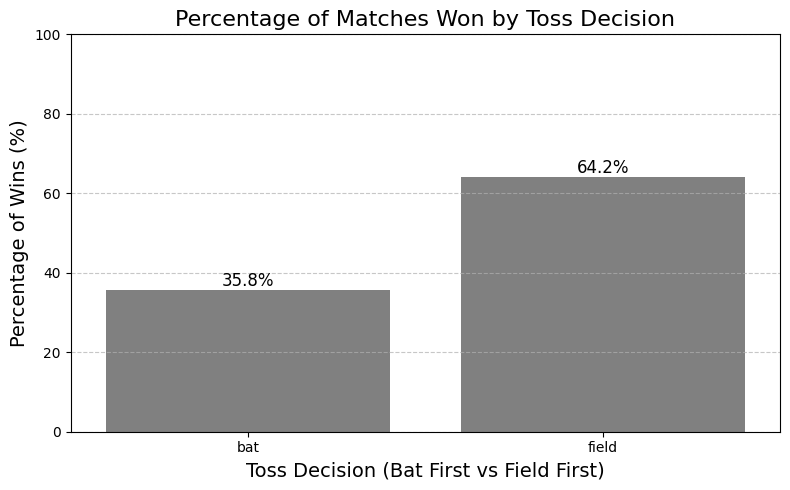

In [94]:
# Removing rows where the winner is missing
match_cleaned_1 = match.dropna(subset=['winner'])

# Grouping by toss decision and counting how often each decision leads to a win
wins_by_decision = match_cleaned_1.groupby('toss_decision').size().reset_index(name='wins')

# Calculating the percentage of matches won by teams batting first vs. fielding first
total_matches = match_cleaned_1.shape[0]
wins_by_decision['percentage'] = (wins_by_decision['wins'] / total_matches) * 100

# Displaying the result
print(wins_by_decision)

# Plotting the results
plt.figure(figsize=(8, 5))
sns.barplot(data=wins_by_decision, x='toss_decision', y='percentage',color='grey')

# Adding titles and labels
plt.title('Percentage of Matches Won by Toss Decision', fontsize=16)
plt.xlabel('Toss Decision (Bat First vs Field First)', fontsize=14)
plt.ylabel('Percentage of Wins (%)', fontsize=14)

# Adding values on top of the bars
for index, row in wins_by_decision.iterrows():
    plt.text(index, row['percentage'] + 1, f'{row["percentage"]:.1f}%', 
             ha='center', fontsize=12)

plt.ylim(0, 100)  
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.tight_layout()  
plt.show()

In [95]:
import pandas as pd
#total match played by team 
total_matches= (match['team1'].value_counts()+match['team2'].value_counts()).rename_axis('Team').reset_index(name="Total_Match_Played")
# Count of wins for each team
total_wins = match['winner'].value_counts().rename_axis('Team').reset_index(name='Total_Wins')

# Count of wins when chasing a target
team_chasing = match[match['toss_decision'] == 'field']['winner'].value_counts().rename_axis('Team').reset_index(name='Chasing_Wins')

# Count of wins when batting first
team_batting_first = match[match['toss_decision'] == 'bat']['winner'].value_counts().rename_axis('Team').reset_index(name='Batting_First_Wins')


# Merge all the DataFrames
merged_df = total_matches.merge(total_wins,on='Team',how='outer') \
    .merge(team_chasing, on='Team', how='outer') \
    .merge(team_batting_first, on='Team', how='outer') 
    

# Fill NaN values with 0
merged_df= merged_df.fillna(0)
#sorting by total match played
merged_df.sort_values(by='Total_Match_Played', ascending=False, inplace=True)
# Display the final merged DataFrame
merged_df.set_index('Team', drop=True).sort_values(by='Total_Wins', ascending=False)

,Total_Match_Played,Total_Wins,Chasing_Wins,Batting_First_Wins
Team,,,,
Mumbai Indians,261,144,90,54.0
Chennai Super Kings,238,138,75,63.0
Kolkata Knight Riders,251,131,81,50.0
Royal Challengers Bengaluru,255,123,85,38.0
Sunrisers Hyderabad,257,117,73,44.0
Delhi Capitals,252,115,73,42.0
Punjab Kings,246,112,84,28.0
Rajasthan Royals,221,112,69,43.0
Gujarat Titans,75,41,30,11.0


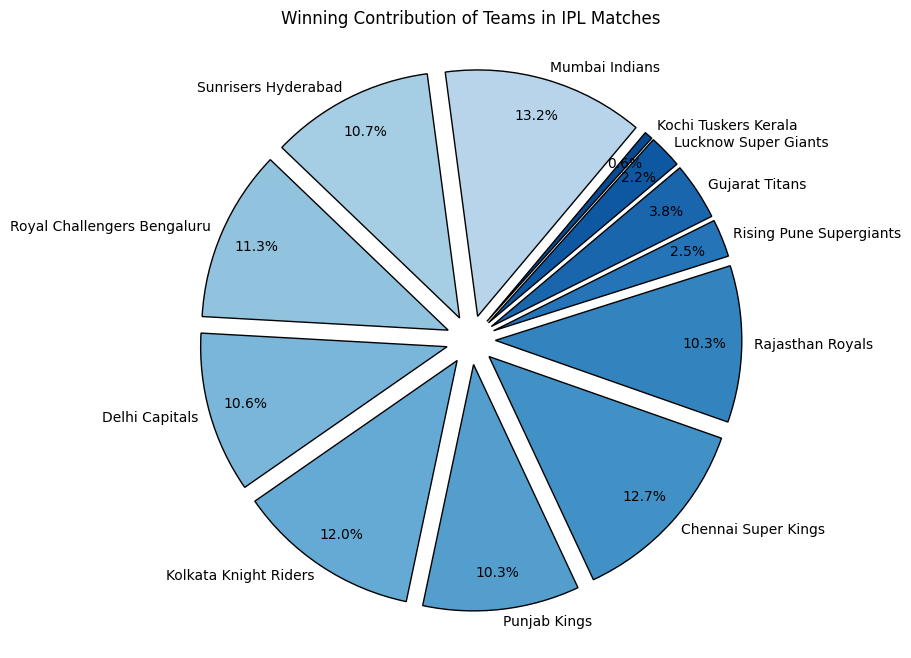

In [97]:
import matplotlib.pyplot as plt
import numpy as np

# Creating a pie chart for showing wining destribution of team in all wining matches 
plt.figure(figsize=(8, 8))
explode = [0.1] * len(merged_df)  
plt.pie(
    merged_df['Total_Wins'],  
    labels=merged_df['Team'],  
    autopct='%1.1f%%',  
    startangle=50,  
    colors=plt.cm.Blues(np.linspace(0.3, 0.9, len(merged_df))),  
    wedgeprops={'edgecolor': 'black'},  
    explode=explode,  
    pctdistance=0.85,  
    labeldistance=1.05  
)

plt.title('Winning Contribution of Teams in IPL Matches')

# Show the pie chart
plt.show()

In [98]:
# Create a copy of the merged DataFrame to keep the original intact
percentage_df = merged_df.copy()

# Convert columns to percentage
percentage_df['Total_Wins'] = (percentage_df['Total_Wins'] / percentage_df['Total_Match_Played']) * 100
percentage_df['Chasing_Wins'] = (percentage_df['Chasing_Wins'] / merged_df['Total_Wins']) * 100
percentage_df['Batting_First_Wins'] = (percentage_df['Batting_First_Wins'] / merged_df['Total_Wins']) * 100
percentage_df.set_index('Team', drop=True).sort_values(by='Total_Wins', ascending=False)

,Total_Match_Played,Total_Wins,Chasing_Wins,Batting_First_Wins
Team,,,,
Chennai Super Kings,238,57.983193,54.347826,45.652174
Mumbai Indians,261,55.172414,62.500000,37.500000
Gujarat Titans,75,54.666667,73.170732,26.829268
Lucknow Super Giants,44,54.545455,75.000000,25.000000
Kolkata Knight Riders,251,52.191235,61.832061,38.167939
Rajasthan Royals,221,50.678733,61.607143,38.392857
Royal Challengers Bengaluru,255,48.235294,69.105691,30.894309
Delhi Capitals,252,45.634921,63.478261,36.521739
Punjab Kings,246,45.528455,75.000000,25.000000


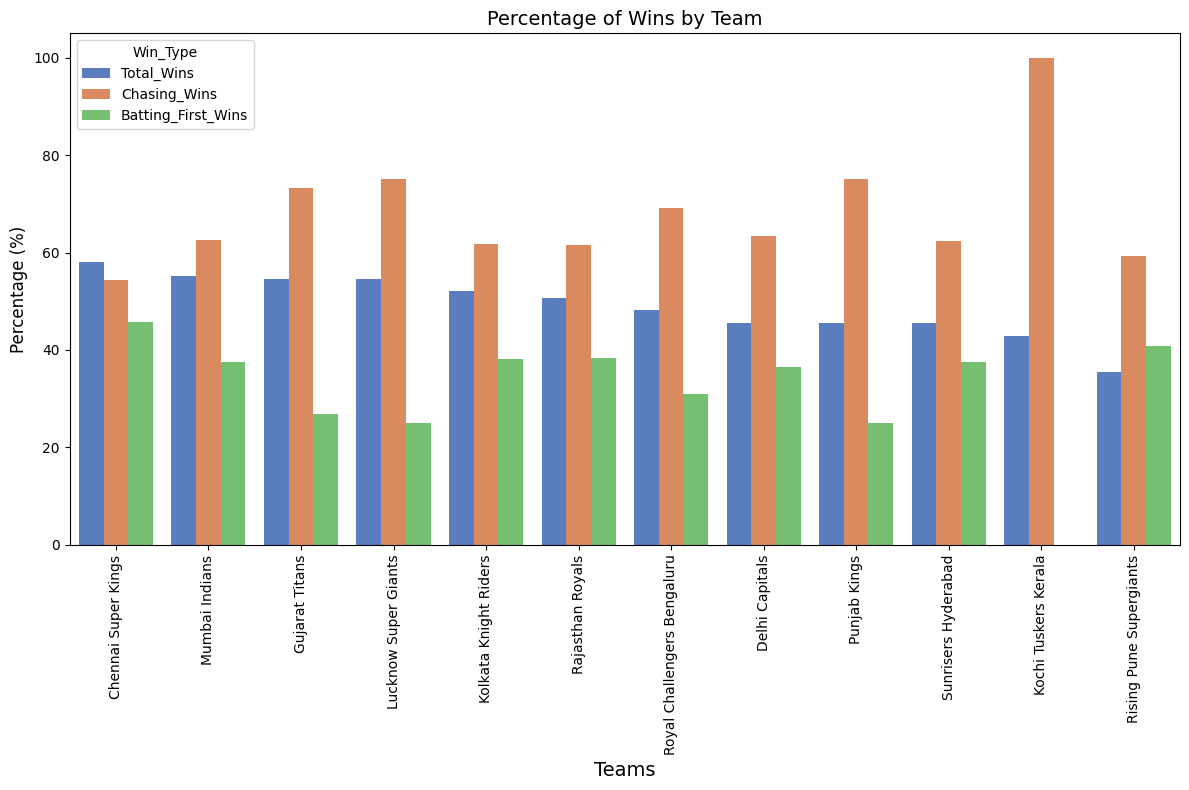

In [101]:
import seaborn as sns

# Melting the DataFrame for easier plotting
melted_df = percentage_df.sort_values(by='Total_Wins', ascending=False).melt(id_vars='Team', 
                                value_vars=['Total_Wins', 'Chasing_Wins', 'Batting_First_Wins'],
                                var_name='Win_Type', 
                                value_name='Percentage')

# Creating a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=melted_df, x='Team', y='Percentage', hue='Win_Type', palette='muted')

# Adding labels and title
plt.xlabel('Teams', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=12)
plt.title('Percentage of Wins by Team', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [104]:
every_team_win_data=match.groupby(['season','winner']).size().reset_index()
every_team_win_data.columns = ['Season', 'Winner','Total win']


In [105]:
MI_HISTORY=every_team_win_data[every_team_win_data['Winner']== 'Mumbai Indians'].style.background_gradient(cmap='coolwarm')
MI_HISTORY

,Season,Winner,Total win
3,2008,Mumbai Indians,7
11,2009,Mumbai Indians,5
19,2010,Mumbai Indians,11
28,2011,Mumbai Indians,10
37,2012,Mumbai Indians,10
46,2013,Mumbai Indians,13
55,2014,Mumbai Indians,7
63,2015,Mumbai Indians,10
71,2016,Mumbai Indians,7
79,2017,Mumbai Indians,12


In [106]:
RR_HISTORY=every_team_win_data[every_team_win_data['Winner']== 'Rajasthan Royals'].style.background_gradient(cmap='coolwarm')
RR_HISTORY

,Season,Winner,Total win
5,2008,Rajasthan Royals,13
13,2009,Rajasthan Royals,6
21,2010,Rajasthan Royals,6
30,2011,Rajasthan Royals,6
39,2012,Rajasthan Royals,7
48,2013,Rajasthan Royals,11
57,2014,Rajasthan Royals,7
65,2015,Rajasthan Royals,7
89,2018,Rajasthan Royals,7
97,2019,Rajasthan Royals,5


In [107]:
CSK_HISTORY=every_team_win_data[every_team_win_data['Winner']== 'Chennai Super Kings'].style.background_gradient(cmap='coolwarm')
CSK_HISTORY

,Season,Winner,Total win
0,2008,Chennai Super Kings,9
8,2009,Chennai Super Kings,8
16,2010,Chennai Super Kings,9
24,2011,Chennai Super Kings,11
34,2012,Chennai Super Kings,10
43,2013,Chennai Super Kings,12
52,2014,Chennai Super Kings,10
60,2015,Chennai Super Kings,10
84,2018,Chennai Super Kings,11
92,2019,Chennai Super Kings,10


In [113]:
RCB_HISTORY=every_team_win_data[every_team_win_data['Winner']== 'Royal Challengers Bengaluru'].style.background_gradient(cmap='coolwarm')
RCB_HISTORY

,Season,Winner,Total win
6,2008,Royal Challengers Bengaluru,4
14,2009,Royal Challengers Bengaluru,9
22,2010,Royal Challengers Bengaluru,8
32,2011,Royal Challengers Bengaluru,10
41,2012,Royal Challengers Bengaluru,8
50,2013,Royal Challengers Bengaluru,9
58,2014,Royal Challengers Bengaluru,5
66,2015,Royal Challengers Bengaluru,8
74,2016,Royal Challengers Bengaluru,9
82,2017,Royal Challengers Bengaluru,3


In [114]:
KKR_HISTORY=every_team_win_data[every_team_win_data['Winner']== 'Kolkata Knight Riders'].style.background_gradient(cmap='coolwarm')
KKR_HISTORY

,Season,Winner,Total win
2,2008,Kolkata Knight Riders,6
10,2009,Kolkata Knight Riders,3
18,2010,Kolkata Knight Riders,7
27,2011,Kolkata Knight Riders,8
36,2012,Kolkata Knight Riders,12
45,2013,Kolkata Knight Riders,6
54,2014,Kolkata Knight Riders,11
62,2015,Kolkata Knight Riders,7
70,2016,Kolkata Knight Riders,8
78,2017,Kolkata Knight Riders,9


In [108]:
plus200 = match[match['target_runs'] > 200].groupby('season').size().reset_index(name='times')
plus200

,season,times
0,2008,7
1,2009,1
2,2010,5
3,2011,4
4,2012,4
5,2013,4
6,2014,5
7,2015,6
8,2016,5
9,2017,8


In [110]:
Toss_data=match.value_counts('toss_winner').reset_index(name='Total Win').style.background_gradient(cmap='cividis')
Toss_data

,toss_winner,Total Win
0,Mumbai Indians,143
1,Sunrisers Hyderabad,131
2,Delhi Capitals,130
3,Chennai Super Kings,122
4,Kolkata Knight Riders,122
5,Royal Challengers Bengaluru,121
6,Rajasthan Royals,120
7,Punjab Kings,109
8,Gujarat Titans,37
9,Rising Pune Supergiants,33


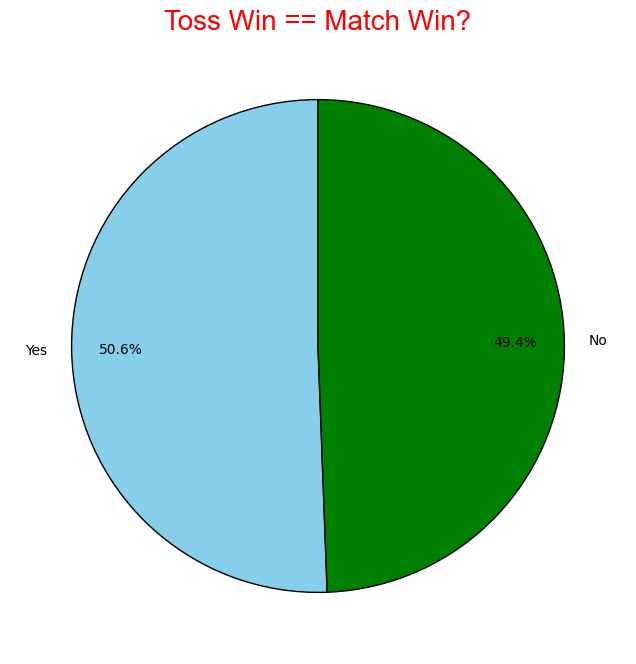

In [119]:
import numpy as np

match['toss_win == game_win'] = np.where(match['toss_winner'] == match['winner'], 'Yes', 'No')


import matplotlib.pyplot as plt

# Calculate the values and labels for the pie chart
values = match['toss_win == game_win'].value_counts()
labels = ["Yes", "No"]
colors = ['skyblue', 'green']

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops={'edgecolor': 'black'}, pctdistance=0.8)

# Add a title
plt.title('Toss Win == Match Win?', fontsize=20, fontfamily='Arial', color='red')

# Display the chart
plt.show()


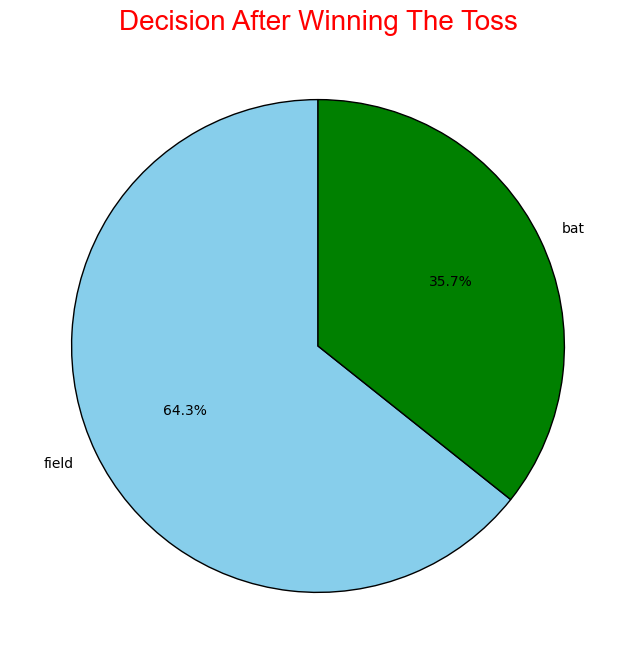

In [121]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the percentages for the pie chart
temp_series = match['toss_decision'].value_counts()
labels = np.array(temp_series.index)
values = np.array((temp_series / temp_series.sum()) * 100)
colors = ['skyblue', 'green']

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    values, 
    labels=labels, 
    autopct='%1.1f%%', 
    colors=colors, 
    startangle=90, 
    wedgeprops={'edgecolor': 'black'}
)

# Add the title
plt.title(
    'Decision After Winning The Toss', 
    fontsize=20, 
    fontfamily='Arial', 
    color='red'
)

# Display the chart
plt.show()


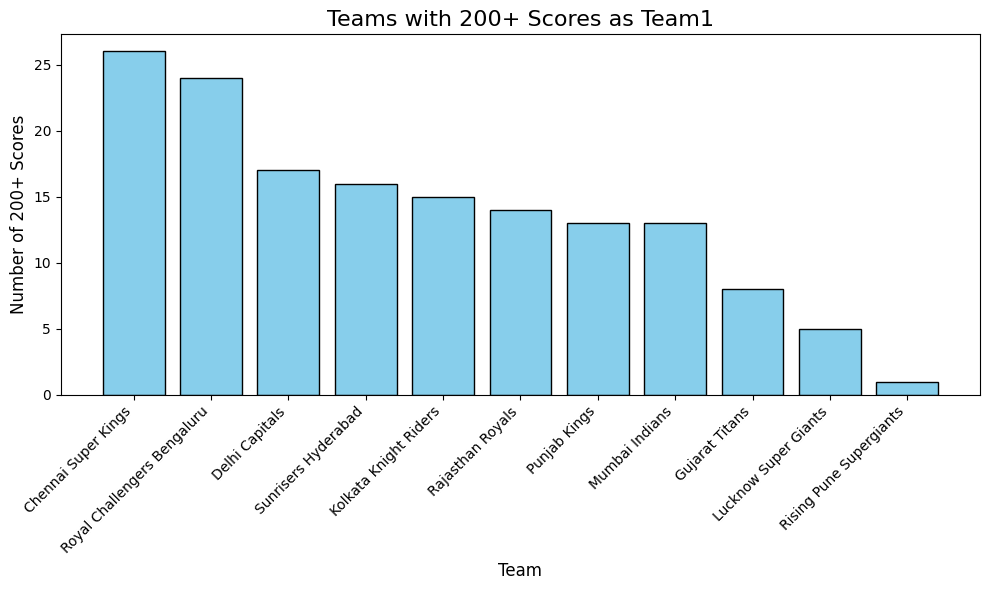

In [122]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the dataset for scores >= 200 in the 'target_runs' column
team1_200_scores = match[match['target_runs'] >= 200]['team1'].value_counts()

# Convert to a DataFrame for further processing
team1_200_scores_df = team1_200_scores.reset_index()
team1_200_scores_df.columns = ['Team', '200+ Scores']
team1_200_scores_df.sort_values(by='200+ Scores', ascending=False, inplace=True)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(
    team1_200_scores_df['Team'], 
    team1_200_scores_df['200+ Scores'], 
    color='skyblue', 
    edgecolor='black'
)

# Add titles and labels
plt.title('Teams with 200+ Scores as Team1', fontsize=16)
plt.xlabel('Team', fontsize=12)
plt.ylabel('Number of 200+ Scores', fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


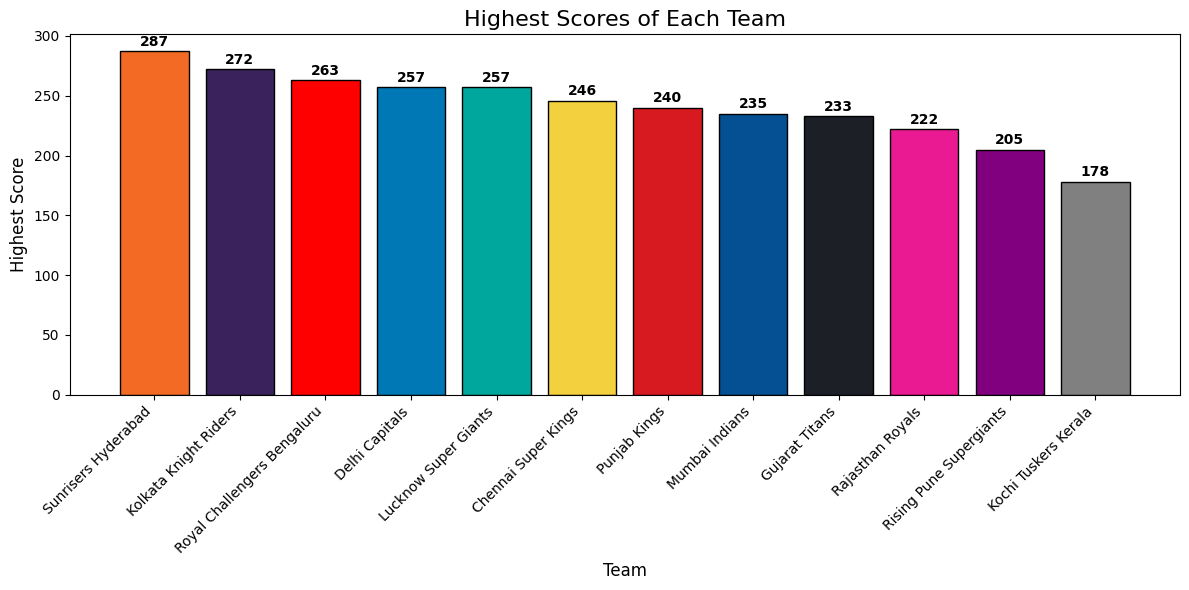

In [131]:
import pandas as pd
import matplotlib.pyplot as plt

# Team theme colors (customize as needed)
team_colors = {
    "Chennai Super Kings": "#F3D03E",
    "Delhi Capitals": "#0078B5",
    "Kolkata Knight Riders": "#3A225D",
    "Mumbai Indians": "#045093",
    "Punjab Kings": "#D71920",
    "Rajasthan Royals": "#EA1A92",
    "Royal Challengers Bengaluru": "#FF0000",
    "Sunrisers Hyderabad": "#F26A24",
    "Gujarat Titans": "#1C1F26",
    "Rising Pune Supergiants" : "#800080",
    "Lucknow Super Giants": "#00A79D",
}

# Find the highest score for each team
highest_scores = match.groupby('team1')['target_runs'].max().reset_index()
highest_scores.columns = ['Team', 'Highest Score']

# Correct for the +1 issue
highest_scores['Highest Score'] -= 1

# Convert scores to integers
highest_scores['Highest Score'] = highest_scores['Highest Score'].astype(int)

# Sort by highest score in descending order
highest_scores.sort_values(by='Highest Score', ascending=False, inplace=True)

# Extract team names, scores, and colors
teams = highest_scores['Team']
scores = highest_scores['Highest Score']
colors = [team_colors.get(team, '#808080') for team in teams]  # Default color if team not in dictionary

# Plot the bar graph
plt.figure(figsize=(12, 6))
bars = plt.bar(teams, scores, color=colors, edgecolor='black')

# Add exact values above the bars
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 2,  # Position the text slightly above the bar
             f"{score}", ha='center', va='bottom', fontsize=10, fontweight='bold')

# Add labels and title
plt.title('Highest Scores of Each Team', fontsize=16)
plt.xlabel('Team', fontsize=12)
plt.ylabel('Highest Score', fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


In [136]:
import pandas as pd

# Filter for rows where scores are >= 200
team1_200_scores_by_season = match[match['target_runs'] >= 200]

# Group by season and team, and count the occurrences
grouped_data = team1_200_scores_by_season.groupby(['season', 'team1']).size().reset_index(name='200+ Scores')

# Pivot the table to get teams as rows and seasons as columns
pivot_table = grouped_data.pivot(index='team1', columns='season', values='200+ Scores')

# Fill NaN values with 0 and convert to integers
pivot_table = pivot_table.fillna(0).astype(int)

# Display the pivot table
pivot_table.head(15)
# print(pivot_table)

# Optional: Save to CSV if needed
# pivot_table.to_csv('200_plus_scores_by_season.csv')


season,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
team1,,,,,,,,,,,,,,,,,
Chennai Super Kings,2,0,1,1,1,1,2,1,0,0,2,0,0,2,4,5,4
Delhi Capitals,0,0,1,1,3,0,0,0,0,2,1,1,1,0,2,1,4
Gujarat Titans,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,4,3
Kolkata Knight Riders,0,0,1,0,0,0,1,0,0,0,3,2,0,0,0,2,6
Lucknow Super Giants,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,2
Mumbai Indians,0,0,1,0,0,1,0,2,1,1,2,0,2,1,0,1,1
Punjab Kings,2,1,0,1,0,0,1,0,0,1,0,0,2,1,1,2,1
Rajasthan Royals,0,0,0,0,0,0,1,2,0,0,1,0,1,1,3,5,0
Rising Pune Supergiants,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [141]:
import pandas as pd

# Filter for matches with super overs
super_overs = match[match['super_over'] == 'Y']

# Group by season to count super overs
season_wise_super_overs = super_overs.groupby('season').size().reset_index(name='Number of Super Overs')

# Select relevant columns for the detailed view
super_over_details = super_overs[['season', 'team1', 'team2', 'city']].reset_index(drop=True)

# Beautify the tables using pandas styling
styled_season_table = season_wise_super_overs.style.set_table_styles(
    [{'selector': 'thead th', 'props': [('font-size', '14px'), ('text-align', 'center'), ('background-color', '#ff0000')]},
     {'selector': 'tbody td', 'props': [('font-size', '12px'), ('text-align', 'center')]}]
).set_caption("Season-wise Super Overs Count")

styled_details_table = super_over_details.style.set_table_styles(
    [{'selector': 'thead th', 'props': [('font-size', '14px'), ('text-align', 'center'), ('background-color', '#ff0000')]},
     {'selector': 'tbody td', 'props': [('font-size', '12px'), ('text-align', 'center')]}]
).set_caption("Details of Matches with Super Overs")

# Display the tables
styled_season_table



,season,Number of Super Overs
0,2009,1
1,2010,1
2,2013,2
3,2014,1
4,2015,1
5,2017,1
6,2019,2
7,2020,4
8,2021,1


In [142]:
styled_details_table

,season,team1,team2,city
0,2009,Kolkata Knight Riders,Rajasthan Royals,Cape Town
1,2010,Chennai Super Kings,Punjab Kings,Chennai
2,2013,Sunrisers Hyderabad,Royal Challengers Bengaluru,Hyderabad
3,2013,Royal Challengers Bengaluru,Delhi Capitals,Bangalore
4,2014,Kolkata Knight Riders,Rajasthan Royals,Abu Dhabi
5,2015,Rajasthan Royals,Punjab Kings,Ahmedabad
6,2017,Gujarat Titans,Mumbai Indians,Rajkot
7,2019,Kolkata Knight Riders,Delhi Capitals,Delhi
8,2019,Mumbai Indians,Sunrisers Hyderabad,Mumbai
9,2020,Delhi Capitals,Punjab Kings,Dubai


In [147]:
import pandas as pd

# Filter for matches where the result was by runs
big_wins = match[match['result'] == 'runs']

# Sort by result_margin in descending order
top_20_biggest_wins = big_wins.nlargest(20, 'result_margin')

# Add a column for first innings score
top_20_biggest_wins['First Innings Score'] = top_20_biggest_wins['target_runs'] - 1

# Select relevant columns: winner (team1), loser (team2), city, season, result_margin, and first innings score
top_20_details = top_20_biggest_wins[['season', 'team1', 'team2', 'city', 'result_margin', 'First Innings Score']].copy()

# Rename columns for better readability
top_20_details.rename(columns={
    'team1': 'Winner',
    'team2': 'Loser',
    'result_margin': 'Margin (Runs)'
}, inplace=True)

# Ensure Margin (Runs) is an integer
top_20_details['Margin (Runs)'] = top_20_details['Margin (Runs)'].astype(int)

# Beautify the table using pandas styling
styled_table = top_20_details.style.set_table_styles(
    [
        {'selector': 'thead th', 'props': [('font-size', '14px'), ('text-align', 'center'), ('background-color', '#ff0000')]},
        {'selector': 'tbody td', 'props': [('font-size', '12px'), ('text-align', 'center')]}
    ]
).set_caption("Top 10 Biggest Wins by Runs in IPL")

# Display the styled table
styled_table


,season,Winner,Loser,city,Margin (Runs),First Innings Score
620,2017,Delhi Capitals,Mumbai Indians,Delhi,146,212.000000
560,2016,Royal Challengers Bengaluru,Gujarat Titans,Bangalore,144,248.000000
0,2008,Royal Challengers Bengaluru,Kolkata Knight Riders,Bangalore,140,222.000000
496,2015,Royal Challengers Bengaluru,Punjab Kings,Bangalore,138,226.000000
352,2013,Royal Challengers Bengaluru,Rising Pune Supergiants,Bangalore,130,263.000000
706,2019,Sunrisers Hyderabad,Royal Challengers Bengaluru,Hyderabad,118,231.000000
1009,2023,Royal Challengers Bengaluru,Rajasthan Royals,Jaipur,112,171.000000
236,2011,Punjab Kings,Royal Challengers Bengaluru,Dharamsala,111,232.000000
1039,2024,Kolkata Knight Riders,Delhi Capitals,Visakhapatnam,106,272.000000
55,2008,Delhi Capitals,Rajasthan Royals,Mumbai,105,192.000000


In [149]:
import pandas as pd

# Filter matches where the method was "D/L"
dl_matches = match[match['method'] == 'D/L']

# Select relevant columns: season, city, team1, team2, and winner
dl_details = dl_matches[['season', 'city', 'team1', 'team2', 'winner']].copy()

# Rename columns for better readability
dl_details.rename(columns={
    'season': 'Season',
    'city': 'City',
    'team1': 'Team1',
    'team2': 'Team2',
    'winner': 'Winner'
}, inplace=True)

# Sort by season for better organization
dl_details.sort_values(by='Season', inplace=True)

# Beautify the table using pandas styling
styled_table = dl_details.style.set_table_styles(
    [
        {'selector': 'thead th', 'props': [('font-size', '14px'), ('text-align', 'center'), ('background-color', '#ff0000')]},
        {'selector': 'tbody td', 'props': [('font-size', '12px'), ('text-align', 'center')]}
    ]
).set_caption("Matches Conducted Using Duckworth-Lewis Method (D/L)")

# Display the styled table
styled_table


,Season,City,Team1,Team2,Winner
38,2008,Delhi,Delhi Capitals,Punjab Kings,Punjab Kings
41,2008,Kolkata,Kolkata Knight Riders,Chennai Super Kings,Chennai Super Kings
60,2009,Cape Town,Delhi Capitals,Punjab Kings,Delhi Capitals
63,2009,Durban,Punjab Kings,Kolkata Knight Riders,Kolkata Knight Riders
89,2009,Centurion,Chennai Super Kings,Punjab Kings,Chennai Super Kings
192,2011,Kochi,Kochi Tuskers Kerala,Chennai Super Kings,Kochi Tuskers Kerala
221,2011,Kolkata,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders
231,2011,Bangalore,Royal Challengers Bengaluru,Kolkata Knight Riders,Royal Challengers Bengaluru
429,2014,Delhi,Delhi Capitals,Sunrisers Hyderabad,Sunrisers Hyderabad
508,2015,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bengaluru,Royal Challengers Bengaluru


In [151]:
import pandas as pd

# Count the number of times each player has won the 'Player of the Match'
player_awards = match['player_of_match'].value_counts().reset_index()

# Rename columns for clarity
player_awards.columns = ['Player', 'Awards']

# Get the top 10 players with the most awards
top_20_players = player_awards.head(20)

# Beautify the table using pandas styling
styled_table = top_20_players.style.set_table_styles(
    [
        {'selector': 'thead th', 'props': [('font-size', '14px'), ('text-align', 'center'), ('background-color', '#ff0000')]},
        {'selector': 'tbody td', 'props': [('font-size', '12px'), ('text-align', 'center')]}
    ]
).set_caption("Top 20 Players with Most 'Player of the Match' Awards")

# Display the styled table
styled_table


,Player,Awards
0,AB de Villiers,25
1,CH Gayle,22
2,RG Sharma,19
3,DA Warner,18
4,V Kohli,18
5,MS Dhoni,17
6,SR Watson,16
7,YK Pathan,16
8,RA Jadeja,16
9,AD Russell,15


In [154]:
import pandas as pd

# Combine umpire1 and umpire2 columns into a single Series
all_umpires = pd.concat([match['umpire1'], match['umpire2']])

# Count the number of matches each umpire participated in
umpire_counts = all_umpires.value_counts().reset_index()

# Rename columns for clarity
umpire_counts.columns = ['Umpire', 'Matches Umpired']

# Exclude any NaN values (if present)
umpire_counts.dropna(inplace=True)

# Get the top 10 umpires
top_umpires = umpire_counts.head(20)

# Beautify the table using pandas styling
styled_table = top_umpires.style.set_table_styles(
    [
        {'selector': 'thead th', 'props': [('font-size', '14px'), ('text-align', 'center'), ('background-color', '#ff0000')]},
        {'selector': 'tbody td', 'props': [('font-size', '12px'), ('text-align', 'center')]}
    ]
).set_caption("Top 20 Umpires with Most IPL Matches")

# Display the styled table
styled_table


,Umpire,Matches Umpired
0,S Ravi,131
1,AK Chaudhary,131
2,Nitin Menon,104
3,HDPK Dharmasena,98
4,C Shamshuddin,88
5,CB Gaffaney,77
6,KN Ananthapadmanabhan,72
7,M Erasmus,67
8,VK Sharma,65
9,BNJ Oxenford,64


In [158]:
import pandas as pd

# Count the number of tosses won by each team
toss_wins = match['toss_winner'].value_counts().reset_index()

# Rename columns for clarity
toss_wins.columns = ['Team', 'Tosses Won']

# Sort the teams by the number of tosses won in descending order
toss_wins_sorted = toss_wins.sort_values(by='Tosses Won', ascending=False)

# Beautify the table using pandas styling
styled_table = toss_wins_sorted.style.set_table_styles(
    [
        {'selector': 'thead th', 'props': [('font-size', '14px'), ('text-align', 'center'), ('background-color', '#ff0000')]},
        {'selector': 'tbody td', 'props': [('font-size', '12px'), ('text-align', 'center')]}
    ]
).set_caption("Teams with Most Tosses Won in IPL History (2008-2024)")

# Display the styled table
styled_table


,Team,Tosses Won
0,Mumbai Indians,143
1,Sunrisers Hyderabad,131
2,Delhi Capitals,130
3,Chennai Super Kings,122
4,Kolkata Knight Riders,122
5,Royal Challengers Bengaluru,121
6,Rajasthan Royals,120
7,Punjab Kings,109
8,Gujarat Titans,37
9,Rising Pune Supergiants,33


In [160]:
import pandas as pd

# Filter the matches for match_type == 'final'
final_matches = match[match['match_type'] == 'Final'][['date', 'city', 'team1', 'team2', 'winner']]

# Sort the results by date
final_matches_sorted = final_matches.sort_values(by='date')

# Beautify the table using pandas styling
styled_table = final_matches_sorted.style.set_table_styles(
    [
        {'selector': 'thead th', 'props': [('font-size', '14px'), ('text-align', 'center'), ('background-color', '#ff0000')]},
        {'selector': 'tbody td', 'props': [('font-size', '12px'), ('text-align', 'center')]}
    ]
).set_caption("IPL Final Games Details")

# Display the styled table
styled_table


,date,city,team1,team2,winner
57,2008-06-01,Mumbai,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals
114,2009-05-24,Johannesburg,Royal Challengers Bengaluru,Sunrisers Hyderabad,Sunrisers Hyderabad
174,2010-04-25,Mumbai,Chennai Super Kings,Mumbai Indians,Chennai Super Kings
247,2011-05-28,Chennai,Chennai Super Kings,Royal Challengers Bengaluru,Chennai Super Kings
321,2012-05-27,Chennai,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders
397,2013-05-26,Kolkata,Chennai Super Kings,Mumbai Indians,Mumbai Indians
457,2014-06-01,Bangalore,Kolkata Knight Riders,Punjab Kings,Kolkata Knight Riders
516,2015-05-24,Kolkata,Mumbai Indians,Chennai Super Kings,Mumbai Indians
576,2016-05-29,Bangalore,Royal Challengers Bengaluru,Sunrisers Hyderabad,Sunrisers Hyderabad
635,2017-05-21,Hyderabad,Mumbai Indians,Rising Pune Supergiants,Mumbai Indians
